# **Project 4 Report**
Ritik Bhardwaj

CS 458

## **P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate the following data points:**

In [ ]:
# Codes for P2-1(a)

import numpy as np 
np.random.seed(0) 
X1 = np.random.randn(50,2)+[2,2] 
X2 = np.random.randn(50,2)+[6,10] 
X3 = np.random.randn(50,2)+[10,2] 
X = np.concatenate((X1,X2,X3)) 

print(X1)
print(X2)
print(X3)
print(X)

[[ 3.76405235  2.40015721]
 [ 2.97873798  4.2408932 ]
 [ 3.86755799  1.02272212]
 [ 2.95008842  1.84864279]
 [ 1.89678115  2.4105985 ]
 [ 2.14404357  3.45427351]
 [ 2.76103773  2.12167502]
 [ 2.44386323  2.33367433]
 [ 3.49407907  1.79484174]
 [ 2.3130677   1.14590426]
 [-0.55298982  2.6536186 ]
 [ 2.8644362   1.25783498]
 [ 4.26975462  0.54563433]
 [ 2.04575852  1.81281615]
 [ 3.53277921  3.46935877]
 [ 2.15494743  2.37816252]
 [ 1.11221425  0.01920353]
 [ 1.65208785  2.15634897]
 [ 3.23029068  3.20237985]
 [ 1.61267318  1.69769725]
 [ 0.95144703  0.57998206]
 [ 0.29372981  3.9507754 ]
 [ 1.49034782  1.5619257 ]
 [ 0.74720464  2.77749036]
 [ 0.38610215  1.78725972]
 [ 1.10453344  2.3869025 ]
 [ 1.48919486  0.81936782]
 [ 1.97181777  2.42833187]
 [ 2.06651722  2.3024719 ]
 [ 1.36567791  1.63725883]
 [ 1.32753955  1.64044684]
 [ 1.18685372  0.2737174 ]
 [ 2.17742614  1.59821906]
 [ 0.36980165  2.46278226]
 [ 1.09270164  2.0519454 ]
 [ 2.72909056  2.12898291]
 [ 3.13940068  0.76517418]
 

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot
your Dendrogram using different linkage{“ward”, “complete”, “average”, “single”}.**

In [ ]:
# Codes for P2-1(b)
from  sklearn.cluster import  AgglomerativeClustering

In [ ]:

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


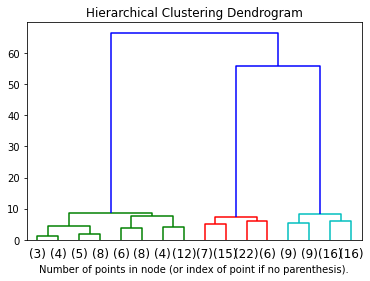

In [ ]:

ward_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='ward')
ward_clusters.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(ward_clusters, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

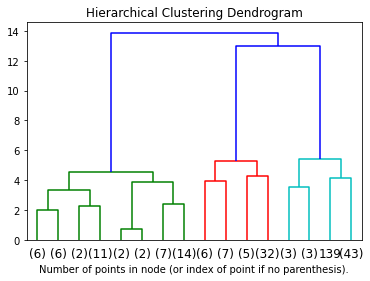

In [ ]:

complete_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='complete')
complete_clusters.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(complete_clusters, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

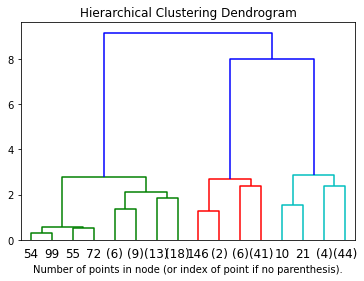

In [ ]:

average_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='average')
average_clusters.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(average_clusters, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

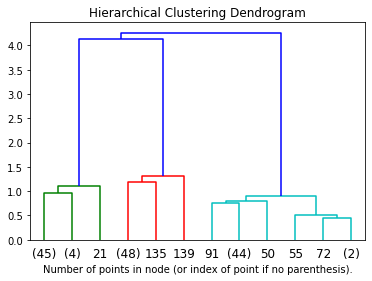

In [ ]:

single_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=0,linkage='single')
single_clusters.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(single_clusters, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# **P4-2. Clustering structured dataset**

**(a) Generate a swiss roll dataset:**

In [ ]:
# Codes for P2-2(a)
print('Plot your dataset')

from sklearn.datasets import make_swiss_roll 
  # Generate data (swiss roll dataset) 
n_samples = 1500 
noise = 0.05 
X, _ = make_swiss_roll(n_samples, noise=noise) 
# Make it thinner 
X[:, 1] *= .5 
print(X)

Plot your dataset
[[-3.69250948  2.66593991 -9.96340275]
 [-4.82426111  7.0130787   6.92670558]
 [ 2.96751083  8.59863552 -4.41277882]
 ...
 [ 5.22805171  7.05746258 -2.56770613]
 [ 5.86027676  0.95007904 -1.44015945]
 [12.39704901  4.98113238  3.49497025]]


**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a), where
you set the parameters as n_clusters=6, connectivity=connectivity, linkage='ward', where
Plot the clustered data in a 3D figure and use different colors for different clusters in your figure.**

In [ ]:
# Codes for P2-2(b)
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X,n_neighbors=10, include_self=False)
cluster = AgglomerativeClustering(n_clusters=6, connectivity =connectivity, linkage='ward')
cluster.fit_predict(X)

array([2, 0, 4, ..., 4, 4, 1])

<Figure size 720x504 with 0 Axes>

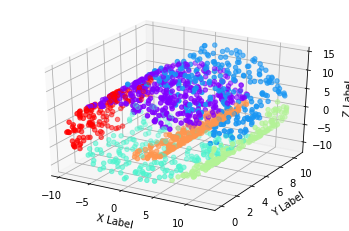

In [ ]:


plt.figure(figsize=(10, 7))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=cluster.labels_, cmap='rainbow')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a). Plot the clustered data in
a 3D figure and use different colors different clusters in your figure. Discuss and compare the
results of DBSCAN with the results in (b).**

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN()
clustering.fit_predict(X)

array([-1, -1, -1, ..., -1, -1, -1])

<Figure size 720x504 with 0 Axes>

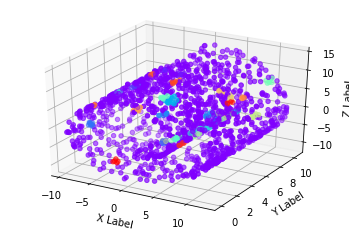

In [ ]:

plt.figure(figsize=(10, 7))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=clustering.labels_, cmap='rainbow')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# **P4-3. Clustering the handwritten digits data**

**(a)  Use the following methods to cluster the data:
K-Means (sklearn.cluster.KMeans)
DBSCAN (sklearn.cluster.DBSCAN)
Optimize the parameters of these methods.**

In [ ]:
# Codes for P2-3(a)
from sklearn import datasets 
digits = datasets.load_digits()



In [ ]:
data =digits.data

In [ ]:
targets = digits.target

In [ ]:
data.shape

(1797, 64)

In [ ]:
targets.shape

(1797,)

In [ ]:
from sklearn.cluster import KMeans


In [ ]:

base_kamen = KMeans(n_clusters=10)

In [ ]:
base_kamen.fit_predict(data)

array([7, 8, 8, ..., 8, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

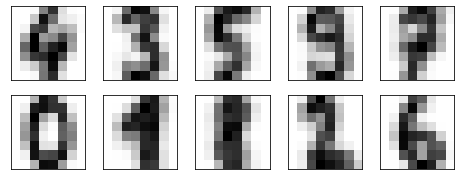

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
np.random.seed(42)

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(data)
db = DBSCAN(eps=0.4, min_samples=14).fit(reduced_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_pred = db.labels_
n_clusters_ = len(set(labels_pred)) - (1 if -1 in labels else 0)


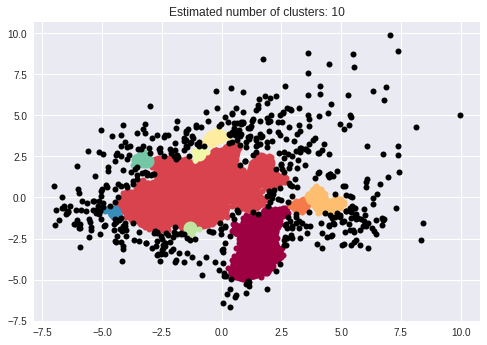

In [ ]:

unique_labels = set(labels_pred)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (labels_pred == k)

    xy = reduced_data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you
the best results in terms of accuracy.**

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy_score(digits.target, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.9432387312186978